In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load Data

In [75]:
demands = pd.read_excel(open('demands21.xlsx', 'rb'))
assuta_items = pd.read_excel("Assuta_items.xlsx")
refresh_21 = pd.read_excel("refresh21.xlsx")
refresh_22 = pd.read_excel("refresh22.xlsx")
initial_inventory = pd.read_excel("Initial_inventory.xls")
daily_demands_22 = pd.read_excel("daily demands 22.xlsx")

### Pre Processing

In [76]:
# fill nulls, rename, merge, slicing

demands.fillna(0,inplace=True)

assuta_items = pd.DataFrame(assuta_items.iloc[:,0])

refresh_21.rename(columns = {f'{refresh_21.columns[0]}':'SKU_ID'}, inplace = True)
refresh_22.rename(columns = {f'{refresh_22.columns[0]}':'SKU_ID'}, inplace = True)
refresh = pd.merge(refresh_21, refresh_22, on ='SKU_ID', how ='inner')
refresh.fillna(0,inplace=True)

initial_inventory = initial_inventory.loc[:,['SKU','Total Qty']]
initial_inventory.rename(columns = {f'{initial_inventory.columns[0]}':'SKU_ID',f'{initial_inventory.columns[1]}':'Total Qty'}, inplace = True)

daily_demands_22.rename(columns = {f'{daily_demands_22.columns[0]}':'SKU_ID'}, inplace = True)

In [65]:
# a = [i.month for i in list(refresh.iloc[:,1:].columns)]

In [78]:
# Remove assuta items from the dataframe
demands = demands[~demands["SKU_ID"].isin(assuta_items["SKU_ID"])]

,SKU_ID,'01','02','03','04','05','06','07','08','09','10','11','12'
0,GS108812,336.0,1224.0,672.0,744.0,948.0,876.0,576.0,516.0,348.0,852.0,0.0,504.0
2,I0194475,96.0,44.0,118.0,59.0,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,WT010656,4.0,0.0,20.0,15.0,0.0,10.0,0.0,5.0,4.0,0.0,44.0,0.0
5,C2242105,21.0,22.0,0.0,24.0,0.0,8.0,6.0,0.0,1.0,9.0,0.0,15.0
6,GS002761,13.0,4.0,29.0,4.0,43.0,13.0,45.0,26.0,30.0,42.0,28.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,GS703250,0.0,0.0,0.0,0.0,0.0,0.0,12.0,99.0,21.0,39.0,24.0,23.0
3008,WT420409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3009,SQ336060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
3010,0SK00441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0


833     3L000351
886     2FK32753
1196    TAR10621
815     2AK01910
2199    2OK52813
          ...   
2354    GS446617
1352    RB852058
1675    RB070615
1416    BY092861
2415    BY092564
Name: SKU_ID, Length: 234, dtype: object

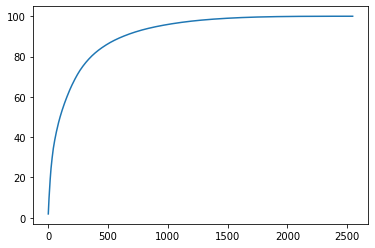

In [93]:
# Group A - 70% of the total demand
demands['sum_demands'] = np.sum(demands, axis=1)
demands_sum = demands.iloc[:,[0,-1]]
demands.drop(['sum_demands'], axis=1, inplace=True)
demands_sum.sort_values(by=['sum_demands'], ascending=False, inplace=True)

demands_sum['cumsum'] = demands_sum['sum_demands'].cumsum()
demands_sum['cumsum_perc'] = 100 * demands_sum['cumsum'] / demands_sum['sum_demands'].sum()

plt.plot(np.arange(len(demands_sum['cumsum_perc'])),demands_sum['cumsum_perc'])
demands_sum['Up_To'] = demands_sum['cumsum_perc'] <= 70
good_sku_ids = demands_sum[demands_sum['Up_To']]
a_list_sku_ids = good_sku_ids['SKU_ID']
a_list_sku_ids

In [95]:
# Leave the SKU id's demands of group A
demands = demands[demands["SKU_ID"].isin(list(a_list_sku_ids))]

,SKU_ID,'01','02','03','04','05','06','07','08','09','10','11','12'
43,RB460148,2915.0,1815.0,614.0,2781.0,3356.0,2612.0,2282.0,2534.0,1587.0,3804.0,2973.0,2339.0
45,F3GM057R,680.0,34550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,RB200941,2516.0,3753.0,1270.0,4763.0,2525.0,2034.0,2981.0,3564.0,1988.0,3687.0,5101.0,5132.0
68,GS043189,240.0,2520.0,2112.0,12480.0,0.0,1632.0,3192.0,2592.0,1800.0,4056.0,5352.0,3936.0
71,RAK00001,2499.0,1720.0,4996.0,2305.0,3228.0,5141.0,3504.0,3714.0,2504.0,2946.0,3411.0,4773.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889,ACTAV020,0.0,0.0,0.0,0.0,9514.0,10780.0,3614.0,15900.0,157.0,640.0,428.0,456.0
2890,RAK00013,0.0,0.0,0.0,0.0,6853.0,5165.0,2844.0,7030.0,4020.0,5544.0,7.0,11741.0
2920,RAK00012,0.0,0.0,0.0,0.0,9467.0,2796.0,2418.0,14144.0,3270.0,4954.0,5648.0,6943.0
2937,BI000251,11240.0,4576.0,5255.0,5701.0,3219.0,21.0,78.0,105.0,38.0,148.0,109.0,96.0


In [ ]:
# Add quarters columns
total_demands["P1"] = total_demands["'01'"] + total_demands["'02'"]
total_demands["P2"] = total_demands["'03'"] + total_demands["'04'"]
total_demands["P3"] = total_demands["'05'"] + total_demands["'06'"]
total_demands["P4"] = total_demands["'07'"] + total_demands["'08'"]
total_demands["P5"] = total_demands["'09'"] + total_demands["'10'"]
total_demands["P6"] = total_demands["'11'"] + total_demands["'12'"]

# Add quarters columns
total_demands["Q1"] = total_demands["'01'"] + total_demands["'02'"] + total_demands["'03'"]
total_demands["Q2"] = total_demands["'04'"] + total_demands["'05'"] + total_demands["'06'"]
total_demands["Q3"] = total_demands["'07'"] + total_demands["'08'"] + total_demands["'09'"]
total_demands["Q4"] = total_demands["'10'"] + total_demands["'11'"] + total_demands["'12'"]

In [ ]:
total_demands

In [ ]:
# total_demands['demand_mean'] = np.mean(total_demands.iloc[:,1:13].to_numpy(),axis=1)
# total_demands['demand_stdv'] = np.std(total_demands.iloc[:,1:13].to_numpy(),axis=1)

In [ ]:
# Make 3 lists - less (r<9.5), good (9.5<r>10.5), more (r>10.5) while r is the number of refreshes per month
refresh = pd.read_csv('refresh.csv')
refresh = refresh.iloc[:-1,:] # Remove the last row ('sum' per month)
refresh.fillna(0,inplace=True)
refresh['mean'] = np.mean(refresh.iloc[:,1:].to_numpy(),axis=1)
sku_ids_0to95 = list(refresh[(refresh['mean']>=0)&(refresh['mean']<9.5)]['SKU_ID'])
sku_ids_95to105 = list(refresh[(refresh['mean']>=9.5)&(refresh['mean']<=10.5)]['SKU_ID'])
sku_ids_over105 = list(refresh[refresh['mean']>10.5]['SKU_ID'])

In [ ]:
hist = refresh['mean'].hist(bins=10,grid=False,figsize=[10,5],legend=True)

In [ ]:
lst1 = list(total_demands['SKU_ID'])
lst2 = sku_ids_0to95 + sku_ids_over105
relevant_sku_ids = list(set(lst1) & set(lst2)) # sku_ids of products that is not good (less or more)
print(f'The number of relevant sku_ids is: {len(relevant_sku_ids)}')

In [ ]:
# Stay with only the relevant products
total_demands = total_demands[total_demands['SKU_ID'].isin(relevant_sku_ids)]
total_demands

### MinMax

In [ ]:
data = total_demands.copy().iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,18]]
data.replace(0.1,0,inplace=True)
data

In [ ]:
# data[data.SKU_ID=='ULM00180']

In [ ]:
# Add quarters columns
data["Q1"] = (data["'01'"] + data["'02'"] + data["'03'"]) / 3
data["Q2"] = (data["'04'"] + data["'05'"] + data["'06'"]) / 3
data["Q3"] = (data["'07'"] + data["'08'"] + data["'09'"]) / 3
data["Q4"] = (data["'10'"] + data["'11'"] + data["'12'"]) / 3

In [ ]:
# data[data.SKU_ID=='ULM00180']

In [ ]:
data_Qs = data.iloc[:,data.columns.isin(['SKU_ID','Q1','Q2','Q3','Q4','YEAR'])]
data_Qs.reset_index(inplace=True,drop=True)
data_Qs

In [ ]:
# data_Qs[data_Qs.SKU_ID=='ULM00180']